In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from tqdm import tqdm
import pandas as pd
from IPython.display import display
import sympy
from scipy.signal import find_peaks

Señal 1 en reposo EMG: [509. 508. 507. ... 510. 509. 510.]
Señal 2 fuerza oponente - Contracción Leve: [509. 507. 508. ... 508. 508. 510.]
Señal 3 levantando mochila - Contracción Fuerte: [512. 510. 508. ... 510. 508. 512.]


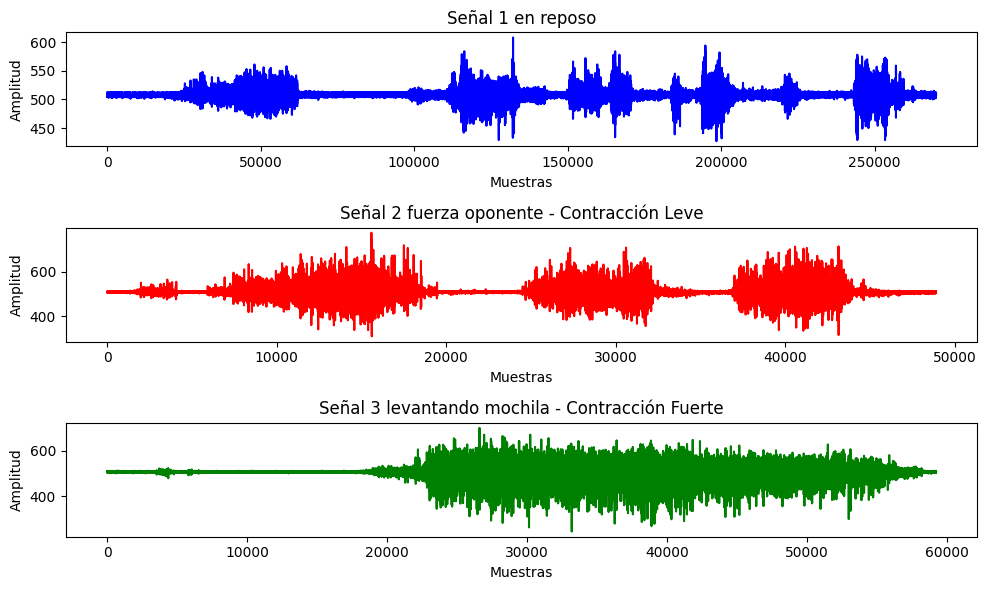

In [ ]:
#Lectura de documento txt con tabulación (/t) como delimitador
array1 = np.genfromtxt("/content/drive/MyDrive/Colab Notebooks/Reposo_EMG.txt", delimiter="\t")
array2= np.genfromtxt("/content/drive/MyDrive/Colab Notebooks/Fuerza_oponente_EMG.txt", delimiter="\t")
array3= np.genfromtxt("/content/drive/MyDrive/Colab Notebooks/Levantando_Mochila_EMG.txt", delimiter="\t")

array1 = array1[:,5]
print("Señal 1 en reposo EMG:",array1)
array2 = array2[:,5]
print("Señal 2 fuerza oponente - Contracción Leve:",array2)
array3= array3[:,5]
print("Señal 3 levantando mochila - Contracción Fuerte:",array3)

plt.figure(figsize=(10, 6))

# Gráfico de la señal 1
plt.subplot(311)
plt.plot(array1, color='blue')
plt.title('Señal 1 en reposo')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Gráfico de la señal 2
plt.subplot(312)
plt.plot(array2, color='red')
plt.title('Señal 2 fuerza oponente - Contracción Leve')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Gráfico de la señal 3
plt.subplot(313)
plt.plot(array3, color='green')
plt.title('Señal 3 levantando mochila - Contracción Fuerte')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

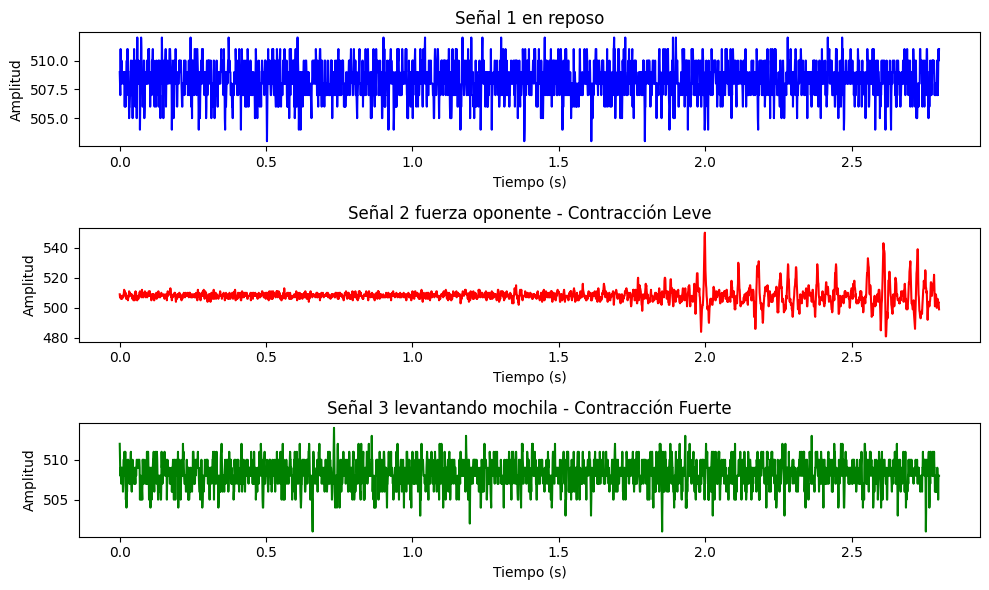

In [ ]:
Fs=1000; #Frecuencia de muestreo
T1=1/Fs
array1=array1[0:2800]
array2=array2[0:2800]
array3=array3[0:2800]
#Los elementos ahora son los mismos para todas las señales
M = len(array1)
n = np.arange(0,M)

t = n/Fs

# Crear figuras y subgráficos
plt.figure(figsize=(10, 6))

# Gráfico de la señal 1
plt.subplot(311)
plt.plot(t, array1, color='blue')
plt.title('Señal 1 en reposo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Gráfico de la señal 2
plt.subplot(312)
plt.plot(t, array2, color='red')
plt.title('Señal 2 fuerza oponente - Contracción Leve')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Gráfico de la señal 3
plt.subplot(313)
plt.plot(t, array3, color='green')
plt.title('Señal 3 levantando mochila - Contracción Fuerte')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

# DFT - Señales originales

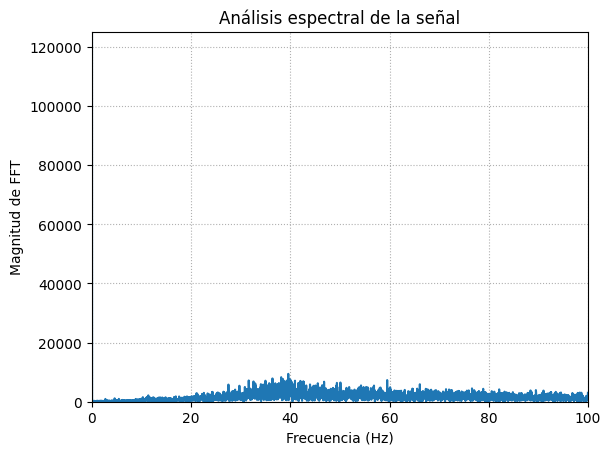

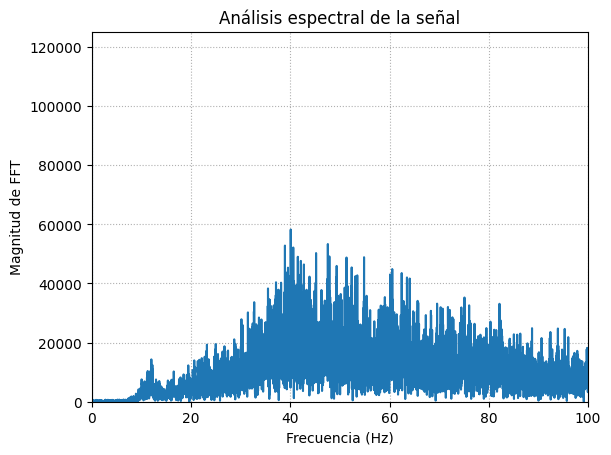

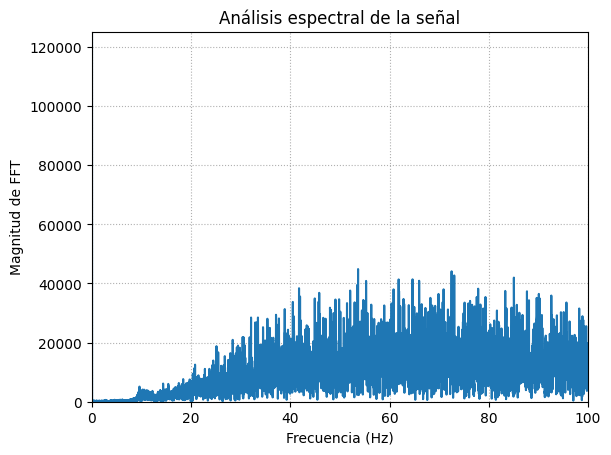

In [ ]:
def analisis_espectral(signal, Fs):
    N = len(signal)
    X = np.fft.fft(signal, N)
    X = X[0:N//2]
    Xm = np.abs(X)
    F = np.linspace(0, Fs/2, N//2)

    plt.plot(F, Xm)
    plt.grid(linestyle=":")
    plt.title("Análisis espectral de la señal")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud de FFT")
    plt.xlim([0, 100])  # Limitando el rango de frecuencia para la visualización
    plt.ylim([0, 0.125*1e6])  # Limitando el rango del espectro para la visualización

    plt.show()

# Usando la función para las señales
analisis_espectral(array1, Fs)
analisis_espectral(array2, Fs)
analisis_espectral(array3, Fs)

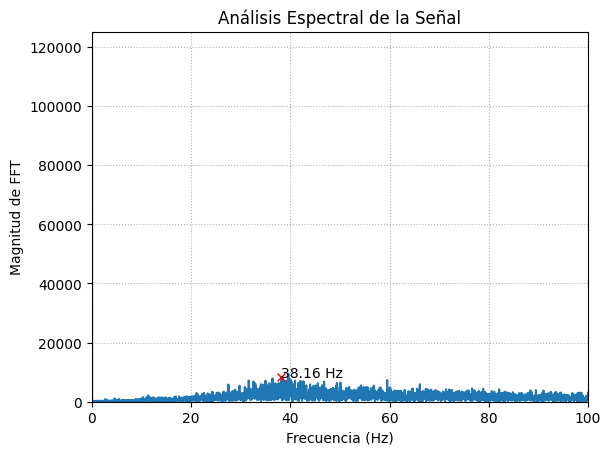

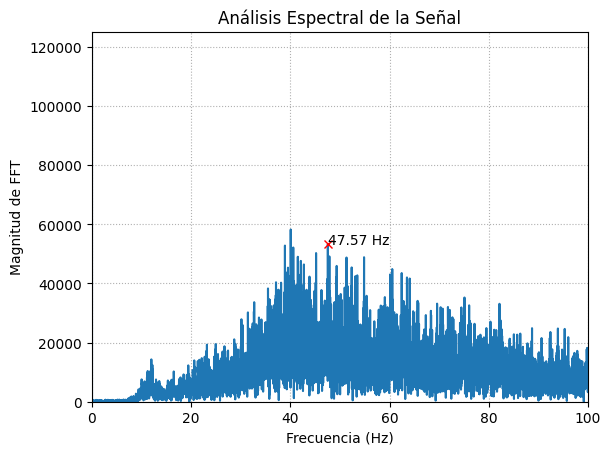

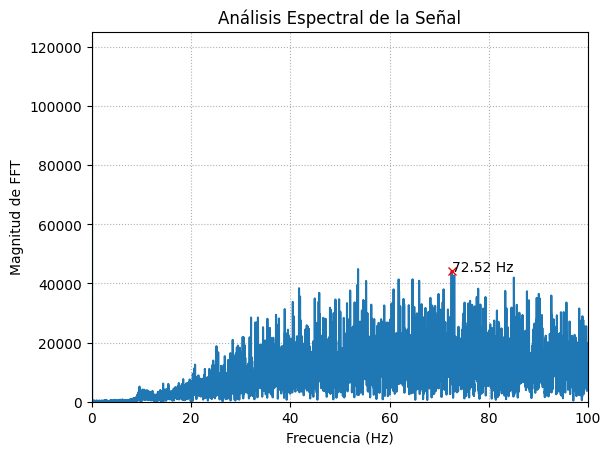

In [ ]:
def analisis_espectral_peak(signal, Fs, N):
    X = np.fft.fft(signal, N)
    X = X[0:N//2]
    Xm = np.abs(X)
    F = np.linspace(0, Fs/2, N//2)

    plt.plot(F, Xm)
    plt.grid(linestyle=":")
    plt.title("Análisis Espectral de la Señal")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud de FFT")
    plt.xlim([0, 100])  # Limitando el rango de frecuencia para la visualización
    plt.ylim([0, 0.125*1e6])  # Limitando el rango del espectro para la visualización

    # Encontrar los dos picos más altos en el espectro
    peaks, _ = find_peaks(Xm, height=100)
    sorted_peaks = sorted(peaks, key=lambda x: Xm[x], reverse=True)
    second_peak_index = sorted_peaks[1]
    second_peak_frequency = F[second_peak_index]
    second_peak_magnitude = Xm[second_peak_index]

    # Marcar el segundo pico más alto en el gráfico
    plt.plot(F[second_peak_index], Xm[second_peak_index], "rx")
    plt.text(F[second_peak_index], Xm[second_peak_index], f"{np.round(second_peak_frequency, 2)} Hz")

    plt.show()

# Aquí irían las definiciones de filtered_array1, filtered_array2 y filtered_array3
N_1 = len(array1)
N_2 = len(array2)
N_3 = len(array3)
analisis_espectral_peak(array1, Fs, N_1)
analisis_espectral_peak(array2, Fs, N_2)
analisis_espectral_peak(array3, Fs, N_3)

# Diseño de filtro

In [ ]:
# Diseño del filtro Butterworth de paso de banda
wp = 2*np.pi*30  # Frecuencia de paso en radianes/segundo
ws = 2*np.pi*82  # Frecuencia de stop en radianes/segundo
N_ord, Wc = signal.buttord(wp, ws, gpass=3, gstop=40, analog=True)  # Cálculo del orden y frecuencia de corte
fc = np.round(Wc/(2*np.pi), 2)  # Frecuencia de corte calculada en Hz
print(f"Orden del filtro: {N_ord}")
print(f"Frecuencia de corte calculada: {fc} Hz")

Orden del filtro: 5
Frecuencia de corte calculada: 30.01 Hz


In [ ]:
# Funcion de transferencia del filtro pasa bajo analogico
b_butter,a_butter = signal.butter(N_ord, Wc, 'lowpass', True, 'ba')

#np.set_printoptions(precision=3)
b_butter,a_butter

(array([2.3852661e+11]),
 array([1.00000000e+00, 6.10274190e+02, 1.86217294e+05, 3.51178062e+07,
        4.09305051e+09, 2.38526610e+11]))

# Respuesta en frecuencia del filtro analógico

Text(0.5, 1.0, 'Filtro Butteworth - Corte en frecuencias altas')

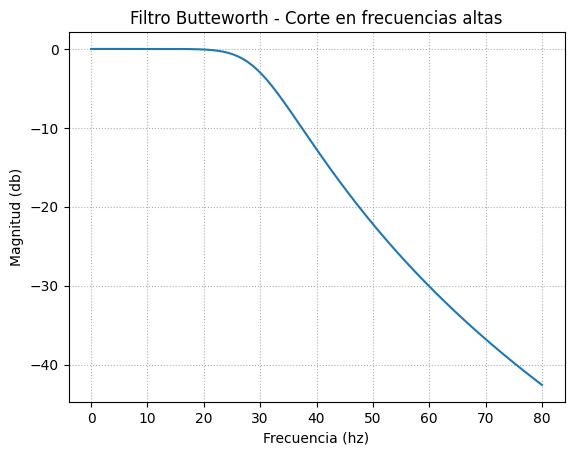

In [ ]:
Fmax=80
F_freqs = np.linspace(0,Fmax,1000)
W_freqs = 2*np.pi*F_freqs  #Angular frecuences

W_freqs, H = signal.freqs(b_butter,a_butter,W_freqs)
Hm=np.abs(H)
plt.plot(F_freqs, 20 * np.log10(Hm))
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (hz)")
plt.ylabel("Magnitud (db)")
plt.title("Filtro Butteworth - Corte en frecuencias altas")

# Transformada bilineal de H(s) a H(z)

Text(0, 0.5, 'Magnitud (db)')

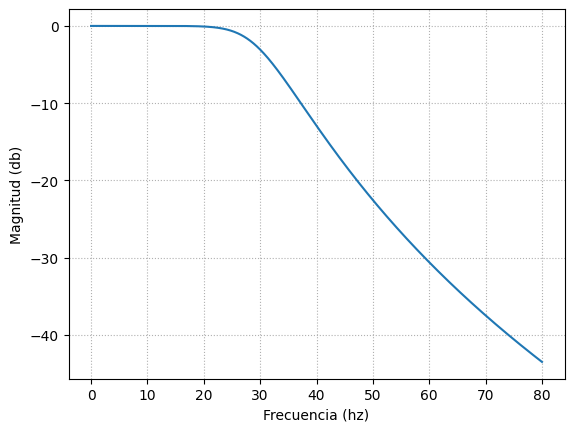

In [ ]:
bd, ad = signal.bilinear(b_butter,a_butter,Fs)

Wz, Hd = signal.freqz(bd, ad, W_freqs/Fs)

Hdm = np.abs(Hd)
plt.plot(F_freqs, 20 * np.log10(Hdm))
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (hz)")
plt.ylabel("Magnitud (db)")

# Filtrado

# Reposo

Text(0.5, 0, 'tiempo (s)')

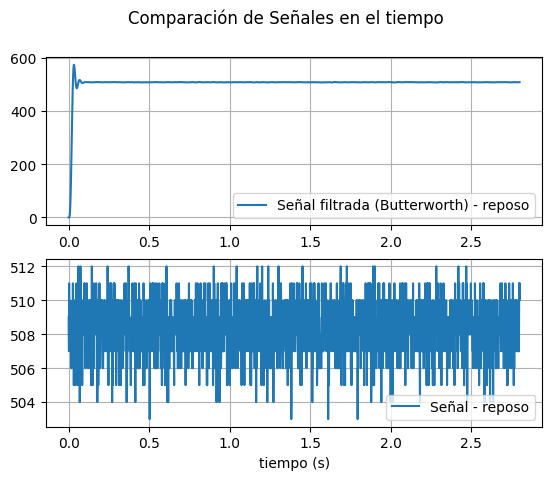

In [ ]:
y1 = signal.lfilter(bd,ad,array1)

fig, ax = plt.subplots(2,1)
fig.suptitle('Comparación de Señales en el tiempo', fontsize=12)
ax[0].plot(t,y1, label="Señal filtrada (Butterworth) - reposo")
ax[0].legend(loc="lower right")
ax[0].grid()
ax[1].plot(t,array1, label="Señal - reposo")
ax[1].legend(loc="lower right")
ax[1].grid()
ax[1].set_xlabel("tiempo (s)")

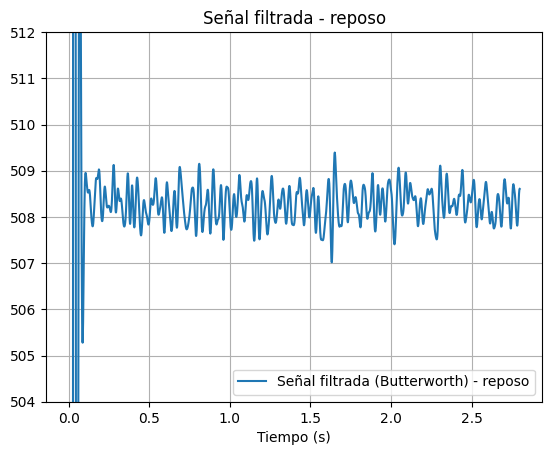

In [ ]:
plt.plot(t, y1, label="Señal filtrada (Butterworth) - reposo")
plt.legend(loc="lower right")
plt.grid()
plt.xlabel("Tiempo (s)")
plt.title("Señal filtrada - reposo")
plt.ylim([504,512])
plt.show()

(0.0, 125000.0)

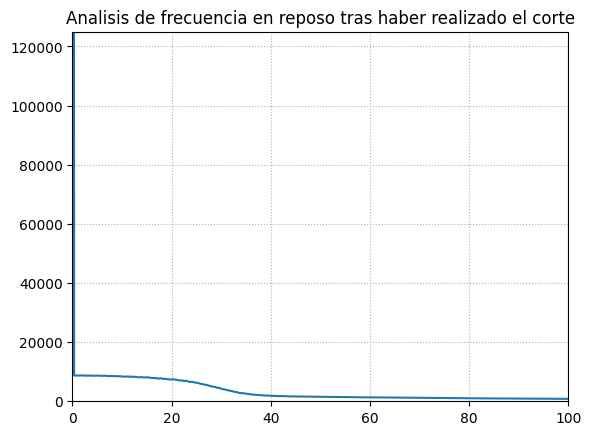

In [ ]:
N1=len(array1)
Yf1 = np.fft.fft(y1,N1)
Yf1 = Yf1[:N1//2]
Ym1 = np.abs(Yf1)

Fd1 = np.linspace(0, Fs//2, N1//2)
plt.plot(Fd1, Ym1)
plt.grid(linestyle=":")
plt.title("Analisis de frecuencia en reposo tras haber realizado el corte")
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])

# Fuerza oponente - Contracción Leve

Text(0.5, 0, 'tiempo (s)')

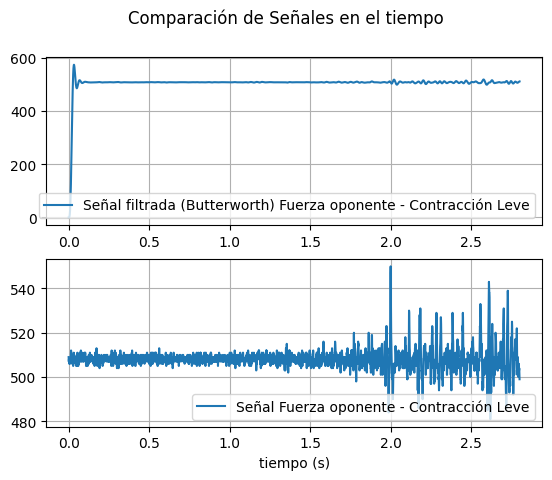

In [ ]:
y2 = signal.lfilter(bd,ad,array2)

fig, ax = plt.subplots(2,1)
fig.suptitle('Comparación de Señales en el tiempo', fontsize=12)
ax[0].plot(t,y2, label="Señal filtrada (Butterworth) Fuerza oponente - Contracción Leve")
ax[0].legend(loc="lower right")
ax[0].grid()
ax[1].plot(t,array2, label="Señal Fuerza oponente - Contracción Leve")
ax[1].legend(loc="lower right")
ax[1].grid()
ax[1].set_xlabel("tiempo (s)")

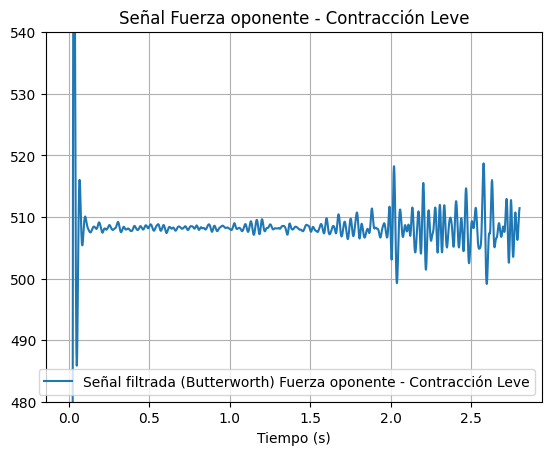

In [ ]:
plt.plot(t, y2, label="Señal filtrada (Butterworth) Fuerza oponente - Contracción Leve")
plt.legend(loc="lower right")
plt.grid()
plt.xlabel("Tiempo (s)")
plt.title("Señal Fuerza oponente - Contracción Leve")
plt.ylim([480,540])
plt.show()

(0.0, 125000.0)

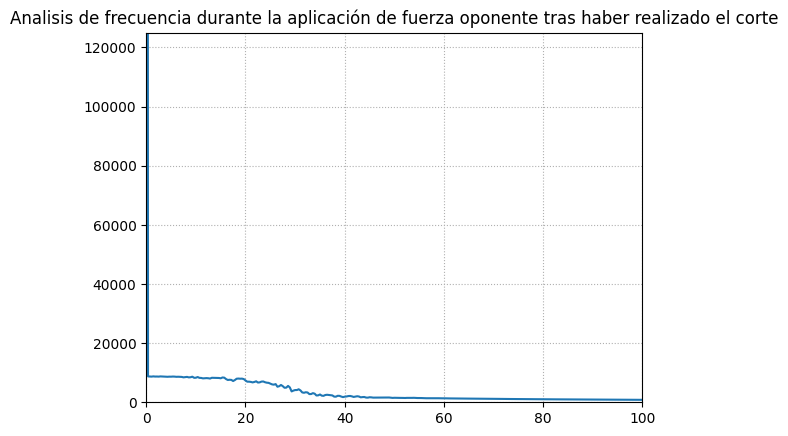

In [ ]:
N2=len(array2)
Yf2 = np.fft.fft(y2,N2)
Yf2 = Yf2[:N2//2]
Ym2 = np.abs(Yf2)

Fd2 = np.linspace(0, Fs//2, N2//2)
plt.plot(Fd2, Ym2)
plt.grid(linestyle=":")
plt.title("Analisis de frecuencia durante la aplicación de fuerza oponente tras haber realizado el corte")
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])

# Levantando mochila - Contracción Fuerte

Text(0.5, 0, 'tiempo (s)')

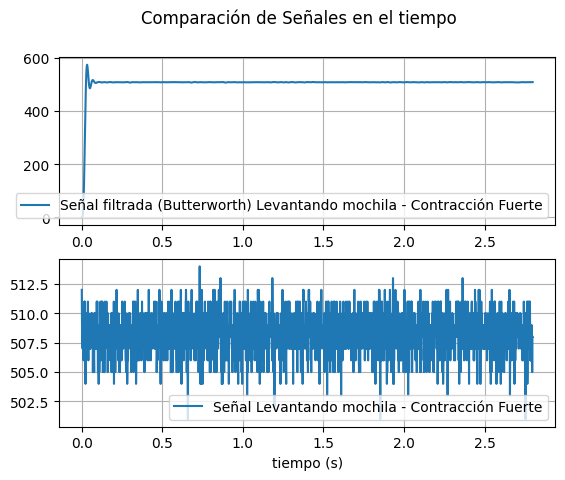

In [ ]:
y3 = signal.lfilter(bd,ad,array3)

fig, ax = plt.subplots(2,1)
fig.suptitle('Comparación de Señales en el tiempo', fontsize=12)
ax[0].plot(t,y3, label="Señal filtrada (Butterworth) Levantando mochila - Contracción Fuerte")
ax[0].legend(loc="lower right")
ax[0].grid()
ax[1].plot(t,array3, label="Señal Levantando mochila - Contracción Fuerte")
ax[1].legend(loc="lower right")
ax[1].grid()
ax[1].set_xlabel("tiempo (s)")

In [ ]:
plt.plot(t, y3, label="Señal filtrada (Butterworth) Levantando mochila - Contracción Fuerte")
plt.legend(loc="lower right")
plt.grid()
plt.xlabel("Tiempo (s)")
plt.title("Señal Levantando mochila - Contracción Fuerte")
plt.show()

(0.0, 125000.0)

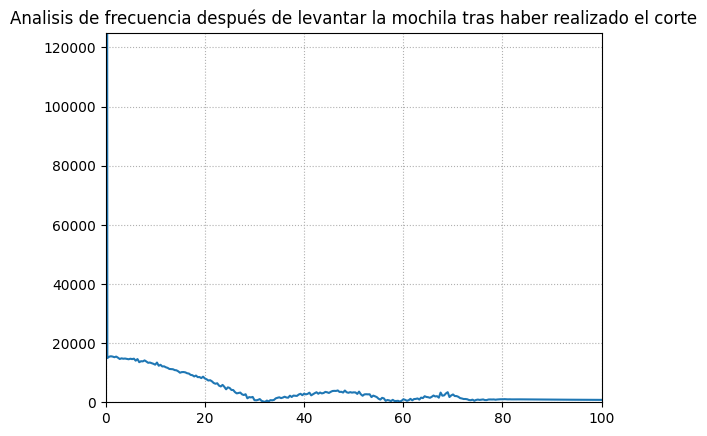

In [ ]:
N3=len(array3)
Yf3 = np.fft.fft(y3,N3)
Yf3 = Yf3[:N3//2]
Ym3 = np.abs(Yf3)

Fd3 = np.linspace(0, Fs//2, N3//2)
plt.plot(Fd3, Ym3)
plt.grid(linestyle=":")
plt.title("Analisis de frecuencia después de levantar la mochila tras haber realizado el corte")
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])